# Cardiovascular Disease Risk Determination Using Decision Tree Classifier

Cardiovascular disease is a major accounts for 175,000 deaths which is 27% deaths in the UK and a whooping 702,880 deaths in the US in 2022. In Africa, it is 482 per 100,000 deaths. Thus this research is geared towards using decision tree classifier to classify waist-to-hip ratios according to their CVD Risk rate.

In [16]:
# Import required libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Data Manipulation

In [5]:
data = pd.read_csv('whr_male.csv') # Import
data

,AGE,WAIST,HIP,WHR,HEALTH_RISK
0,50.0,38.0,38.0,1.000000,HIGH
1,28.0,28.0,39.0,0.717949,LOW
2,52.0,31.0,37.0,0.837838,LOW
3,20.0,31.0,38.0,0.815789,LOW
4,18.0,29.0,31.0,0.935484,MODERATE
...,...,...,...,...,...
165,32.0,30.0,29.0,1.034483,HIGH
166,24.0,24.0,23.0,1.043478,HIGH
167,NaN,23.0,21.0,1.095200,HIGH
168,NaN,44.0,40.0,1.100000,HIGH


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          167 non-null    float64
 1   WAIST        170 non-null    float64
 2   HIP          170 non-null    float64
 3   WHR          170 non-null    float64
 4   HEALTH_RISK  170 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [7]:
data.describe()

,AGE,WAIST,HIP,WHR
count,167.000000,170.000000,170.000000,170.000000
mean,23.532934,31.148824,37.325882,0.836033
std,7.323657,3.784322,3.888388,0.062275
min,5.000000,20.000000,21.000000,0.693780
25%,19.000000,29.000000,36.000000,0.800000
50%,22.000000,30.500000,37.000000,0.823529
75%,26.000000,32.000000,39.000000,0.858516
max,68.000000,51.000000,50.000000,1.100000


In [8]:
data.groupby('HEALTH_RISK').size()

,0
HEALTH_RISK,
HIGH,6
LOW,152
MODERATE,12


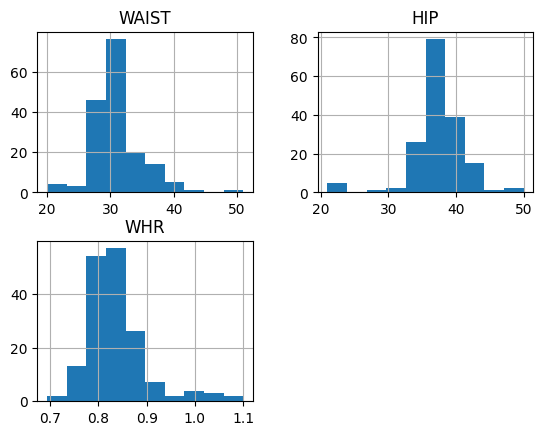

In [9]:
data = data.drop('AGE', axis=1)
data.hist()
plt.show()

In [10]:
# SPlitting data into training and testing set

array = data.values
x = array[:, 0:3]
y = array[:,3]
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=0.2)

##Choosing Machine learning Model

In [11]:
# Comparing Model Accuracy using cross-validation score
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.918681 (0.060430)
DTC: 1.000000 (0.000000)
SVM: 0.889560 (0.048926)


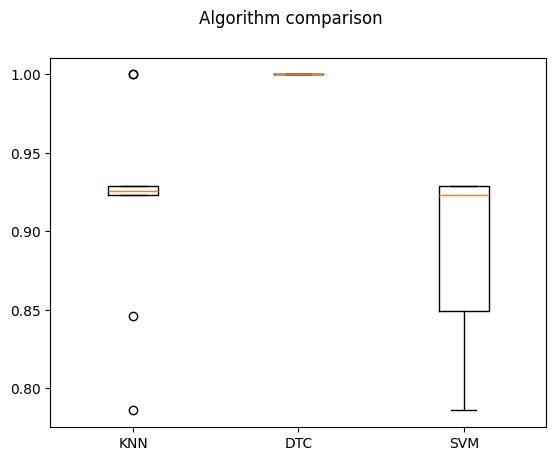

In [12]:
# Visualize the models using a box-plot
fig = plt.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###Making Training our model

In [19]:
# Training and making prediction using DTC classifier
cvd_classifier = DecisionTreeClassifier()
cvd_classifier.fit(x_train, y_train)
predictions = dtc.predict(x_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9705882352941176
[[ 1  0  1]
 [ 0 31  0]
 [ 0  0  1]]
              precision    recall  f1-score   support

       HIGH        1.00      0.50      0.67         2
        LOW        1.00      1.00      1.00        31
   MODERATE        0.50      1.00      0.67         1

    accuracy                           0.97        34
   macro avg       0.83      0.83      0.78        34
weighted avg       0.99      0.97      0.97        34



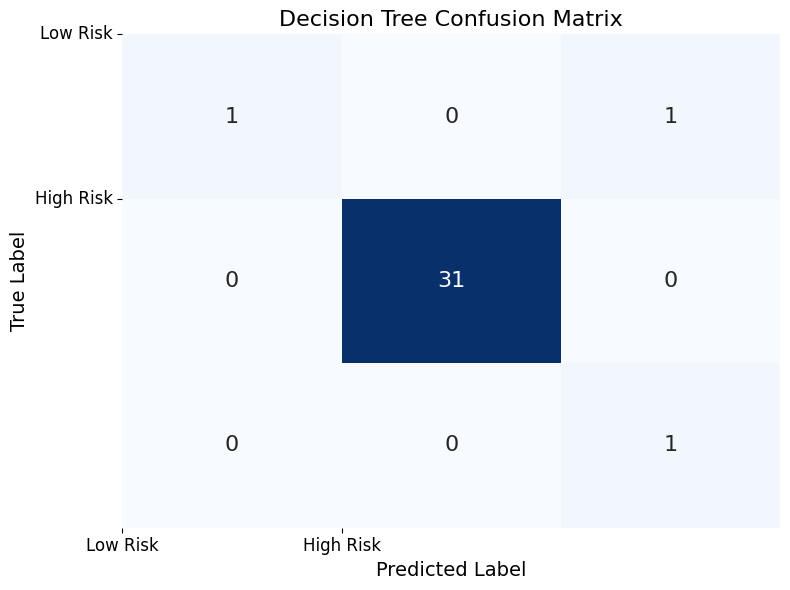

In [20]:
# --- Beautiful Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_validation, predictions),
                annot=True,
                fmt='d',
                cmap='Blues',
                cbar=False,
                annot_kws={"size": 16})
plt.title('Decision Tree Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Low Risk', 'High Risk'], rotation=0, fontsize=12)
plt.yticks(ticks=[0, 1], labels=['Low Risk', 'High Risk'], rotation=0, fontsize=12)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off

# Save the confusion matrix plot (optional)
plt.savefig("decision_tree_confusion_matrix.png")  # Save as PNG
plt.show()  # Display the plot

## Adding the Model to a joblib

In [21]:
import joblib
#  ... (your model training code)
joblib.dump(model, 'cvd_classifier.joblib')

['cvd_classifier.joblib']

In [22]:
from google.colab import files
files.download('cvd_classifier.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>